# **Data Pre-processing**

## **Import Libraries**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Dataset**

In [55]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/Global.csv')
data = pd.read_csv('/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Datasets/Global.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,144379.0,3:URLLC,Benign
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,181691.0,3:URLLC,Benign
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,175580.0,3:URLLC,Benign
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,120239.0,3:URLLC,Benign
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,348612.0,3:URLLC,Benign


In [56]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC,Benign
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC,Benign
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC,Benign
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC,Benign
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC,Malicious
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC,Malicious
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC,Malicious
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC,Malicious


## **Class Distribution Analysis Before Data Cleaning**

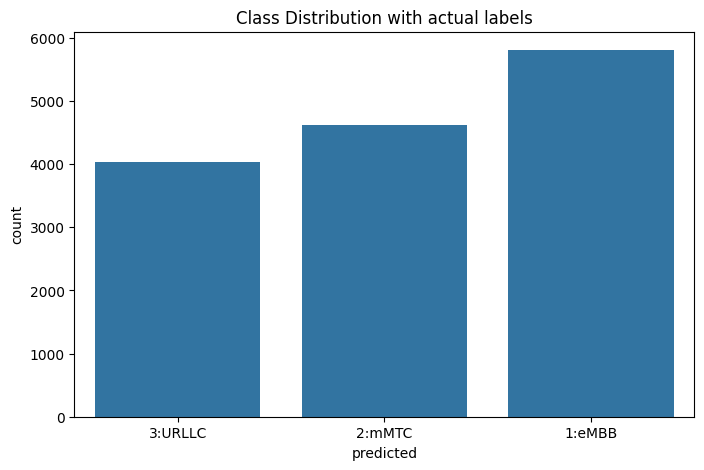

In [57]:
# Class Distribution Analysis before cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

In [58]:
# Rename the "predicted" column to "Slice Type"
data = data.rename(columns={'predicted': 'slice Type'})
# Replace values in the "Slice Type" column
data['slice Type'] = data['slice Type'].replace({'1:eMBB': 1, '2:mMTC': 2, '3:URLLC': 3})
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type,Label
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3,Benign
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3,Benign
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3,Benign
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3,Benign
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2,Malicious
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2,Malicious
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2,Malicious
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2,Malicious


In [59]:
np.unique(data['slice Type'])

array([1, 2, 3])

## **Data Cleaning**

### **Drop non-numeric columns**

In [60]:
# Function to check if a value can be converted to a numeric value
def is_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Check for non-numeric values in each column
non_numeric_columns = []
for column in data.columns:
    if not all(data[column].apply(is_numeric)):
        non_numeric_columns.append(column)

# Print columns with non-numeric values
if non_numeric_columns:
    print("Columns with non-numeric values:", non_numeric_columns)
else:
    print("All columns contain numeric values.")

Columns with non-numeric values: ['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'Label']


In [61]:
data = data.drop(columns=['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'Label'])
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2


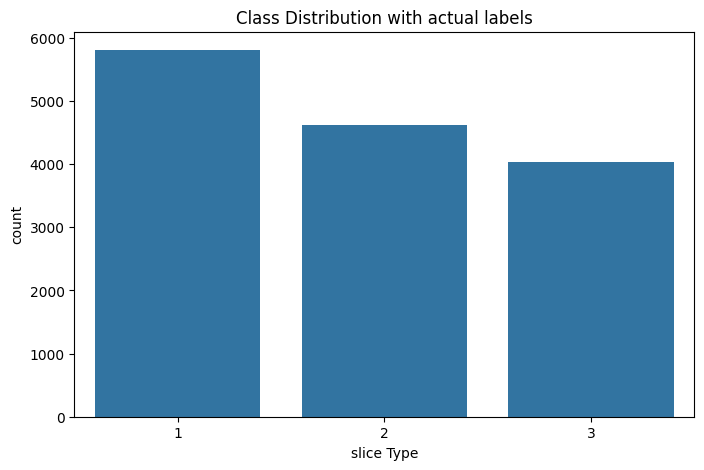

In [62]:
# Class Distribution Analysis after removing non-numeric columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

In [63]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X                 0
Seq               0
Dur               0
RunTime           0
Mean              0
Sum               0
Min               0
Max               0
sTos              1
dTos           3887
sTtl              1
dTtl           3923
sHops             1
dHops          3899
TotPkts           0
SrcPkts           0
DstPkts           0
TotBytes          0
SrcBytes          0
DstBytes          0
Offset            0
sMeanPktSz        0
dMeanPktSz        0
Load              0
SrcLoad           0
DstLoad           0
Loss              0
SrcLoss           0
DstLoss           0
pLoss             0
SrcGap         3113
DstGap         3113
Rate              0
SrcRate           0
DstRate           0
SrcWin         3230
DstWin         4243
sVid          14082
dVid          14452
SrcTCPBase     3113
DstTCPBase     4384
TcpRtt            0
SynAck            0
AckDat            0
UniqueID          0
slice Type        0
dtype: int64


### **Drop empty columns**

In [64]:
data = data.drop(columns=['sVid', 'dVid'])
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,43.465034,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2


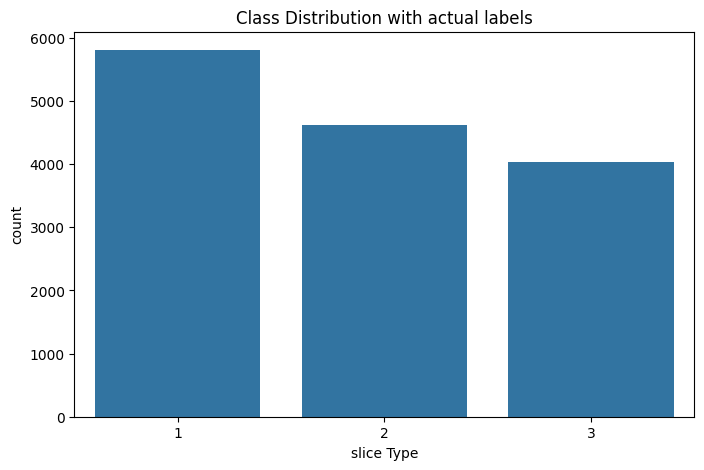

In [65]:
# Class Distribution Analysis after removing empty columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

In [66]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X                0
Seq              0
Dur              0
RunTime          0
Mean             0
Sum              0
Min              0
Max              0
sTos             1
dTos          3887
sTtl             1
dTtl          3923
sHops            1
dHops         3899
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
Offset           0
sMeanPktSz       0
dMeanPktSz       0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
SrcGap        3113
DstGap        3113
Rate             0
SrcRate          0
DstRate          0
SrcWin        3230
DstWin        4243
SrcTCPBase    3113
DstTCPBase    4384
TcpRtt           0
SynAck           0
AckDat           0
UniqueID         0
slice Type       0
dtype: int64


### **Imputing**

In [67]:
from sklearn.impute import SimpleImputer, KNNImputer

temp_data = data
var = 1

In [68]:
if(var == 1): # Median Imputation
  # Create an instance of SimpleImputer
  imputer = SimpleImputer(strategy='median')

  # Perform mode imputation on the DataFrame
  imputed_data = imputer.fit_transform(temp_data)

  # Convert the numpy array back to a DataFrame
  data = pd.DataFrame(imputed_data, columns=temp_data.columns)
  print("Median Imputation")
  print(data)

elif(var == 2): # Mode Imputation
  # Create an instance of SimpleImputer
  imputer = SimpleImputer(strategy='most_frequent')

  # Perform mode imputation on the DataFrame
  imputed_data = imputer.fit_transform(temp_data)

  # Convert the numpy array back to a DataFrame
  data = pd.DataFrame(imputed_data, columns=temp_data.columns)
  print("Mode Imputation")
  print(data)

elif(var == 3): # KNN Imputation
  # Create an instance of KNNImputer
  imputer = KNNImputer(n_neighbors=2)

  # Perform KNN imputation on the DataFrame
  imputed_data = imputer.fit_transform(temp_data)

  # Convert the numpy array back to a DataFrame
  data = pd.DataFrame(imputed_data, columns=temp_data.columns)
  print("KNN Imputation")
  print(data)

elif(var == 4): # Interpolation Imputation
  # Perform linear interpolation imputation
  interpolated_data = temp_data.interpolate(method='linear', axis=0)

  data = interpolated_data
  print("Interpolation Imputation")
  print(data)

# elif(var == 5): # Miss Forest
#   # Create an instance of MissForest
#   imputer = MissForest()

#   # Perform imputation using MissForest
#   imputed_data = imputer.fit_transform(temp_data)

#   # Convert the numpy array back to a DataFrame
#   data = pd.DataFrame(imputed_data, columns=temp_data.columns)
#   data

else: # No Imputation
  print("No Imputation")
  print(data)

Median Imputation
                   X            Seq       Dur   RunTime      Mean       Sum  \
0       34555.000000     982.000000  0.000289  0.000289  0.000289  0.000289   
1      531568.000000   11362.000000  0.000000  0.000000  0.000000  0.000000   
2      360399.000000   70834.000000  2.560251  2.560251  2.560251  2.560251   
3       30702.000000     440.000000  0.046014  0.046014  0.046014  0.046014   
4      312747.000000  128397.000000  0.000000  0.000000  0.000000  0.000000   
...              ...            ...       ...       ...       ...       ...   
14451  455292.377185     281.829734  3.620188  3.961441  3.642492  4.080528   
14452  455262.025767     298.318232  4.376486  2.966175  3.594366  3.873222   
14453  455286.246951     293.324452  3.818366  3.667252  4.340313  4.514485   
14454  455211.102576     171.202752  4.414447  4.101491  4.156414  4.301263   
14455  455225.499992     267.390459  4.162090  3.140710  3.886840  3.137419   

            Min       Max   sTos 

In [69]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X             0
Seq           0
Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
sTos          0
dTos          0
sTtl          0
dTtl          0
sHops         0
dHops         0
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
SrcGap        0
DstGap        0
Rate          0
SrcRate       0
DstRate       0
SrcWin        0
DstWin        0
SrcTCPBase    0
DstTCPBase    0
TcpRtt        0
SynAck        0
AckDat        0
UniqueID      0
slice Type    0
dtype: int64


### **Filter columns with few missing data**

In [64]:
# # Create a dictionary for columns with missing values
# columns_with_missing = {}

# # Iterate through the dictionary of missing values
# for column, count in missing_values.items():
#     columns_with_missing[column] = count

# # Print the dictionary
# print(columns_with_missing)

In [70]:
# Identify all the columns and the missing value count in them
# Create a dictionary for columns with missing values
filtered_columns_with_missing = {}

# Filter out columns with non-zero missing value counts
for column, count in missing_values.items():
    if count != 0 and count > 10:
      filtered_columns_with_missing[column] = count

# Print the filtered dictionary
print(filtered_columns_with_missing)

{}


In [71]:
for column, count in filtered_columns_with_missing.items():
  print(data[column].unique(), "\n\n",data[column].value_counts(dropna=False), "\n\n\n")

In [72]:
# List of all columns containing missing values
columns_to_remove = list(filtered_columns_with_missing.keys())
columns_to_remove

[]

In [73]:
data = data.drop(columns=columns_to_remove)
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.443790e+05,3.0
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.816910e+05,3.0
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.755800e+05,3.0
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,43.465034,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.202390e+05,3.0
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,3.486120e+05,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2.0
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2.0
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2.0
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2.0


In [74]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X             0
Seq           0
Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
sTos          0
dTos          0
sTtl          0
dTtl          0
sHops         0
dHops         0
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
SrcGap        0
DstGap        0
Rate          0
SrcRate       0
DstRate       0
SrcWin        0
DstWin        0
SrcTCPBase    0
DstTCPBase    0
TcpRtt        0
SynAck        0
AckDat        0
UniqueID      0
slice Type    0
dtype: int64


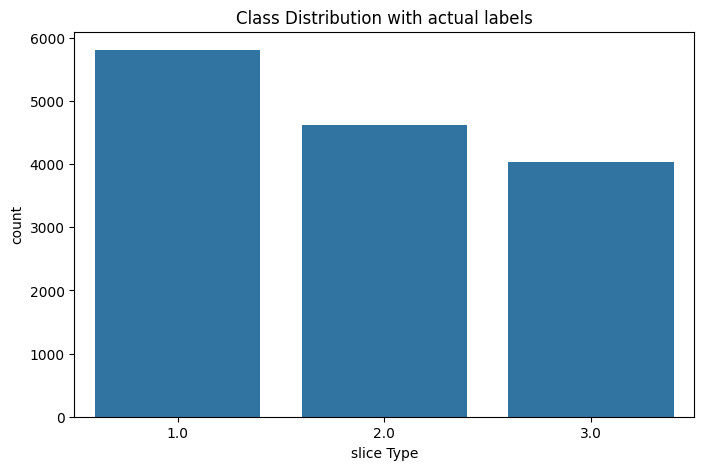

In [75]:
# Class Distribution Analysis after removing empty rows
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

### **Drop empty rows**

In [76]:
data = data.dropna()
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.443790e+05,3.0
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.816910e+05,3.0
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.755800e+05,3.0
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,43.465034,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.202390e+05,3.0
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,3.486120e+05,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2.0
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2.0
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2.0
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2.0


## **Class Distribution Analysis After Data Cleaning**

In [77]:
np.unique(data['slice Type'])

array([1., 2., 3.])

In [78]:
data['slice Type'] = data['slice Type'].astype(int)
np.unique(data['slice Type'])

array([1, 2, 3])

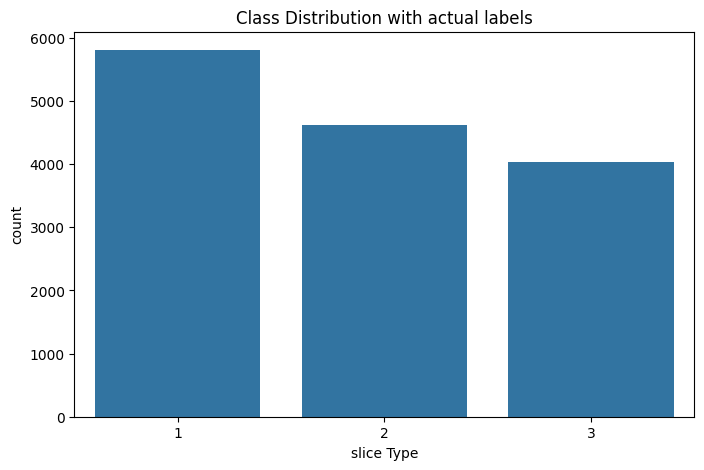

In [79]:
# Class Distribution Analysis after Data Cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

## **Data Evaluation using K-Means**

In [80]:
X = data.drop(columns=['slice Type'])
y = data['slice Type']

# Create a KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_
labels_aligned = labels + 1

actual_label = y
predicted_label = labels_aligned

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
# Performance Metrics
print("Silhouette Score", metrics.silhouette_score(X, predicted_label))
print("Accuracy", accuracy_score(actual_label, predicted_label))
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Silhouette Score 0.4812480572461969
Accuracy 0.46831765356945215
Precision 0.4673480917846964
Recall 0.46831765356945215
F1-score 0.4448022696853628


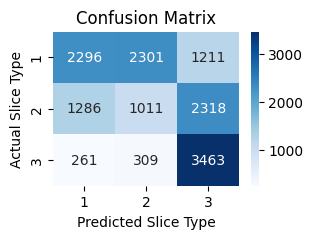

In [82]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

## **Save cleaned data**

In [83]:
data.to_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv', index=False)

# **SYNC NOTEBOOKS**

In [84]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp10 - Data_Preprocessing.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'

In [85]:
%cp '/content/drive/MyDrive/Dataset/Global_cleaned.csv' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Datasets/'